# LBA Proposal 
# CS110
# Prof. Drummond, Fall 2019

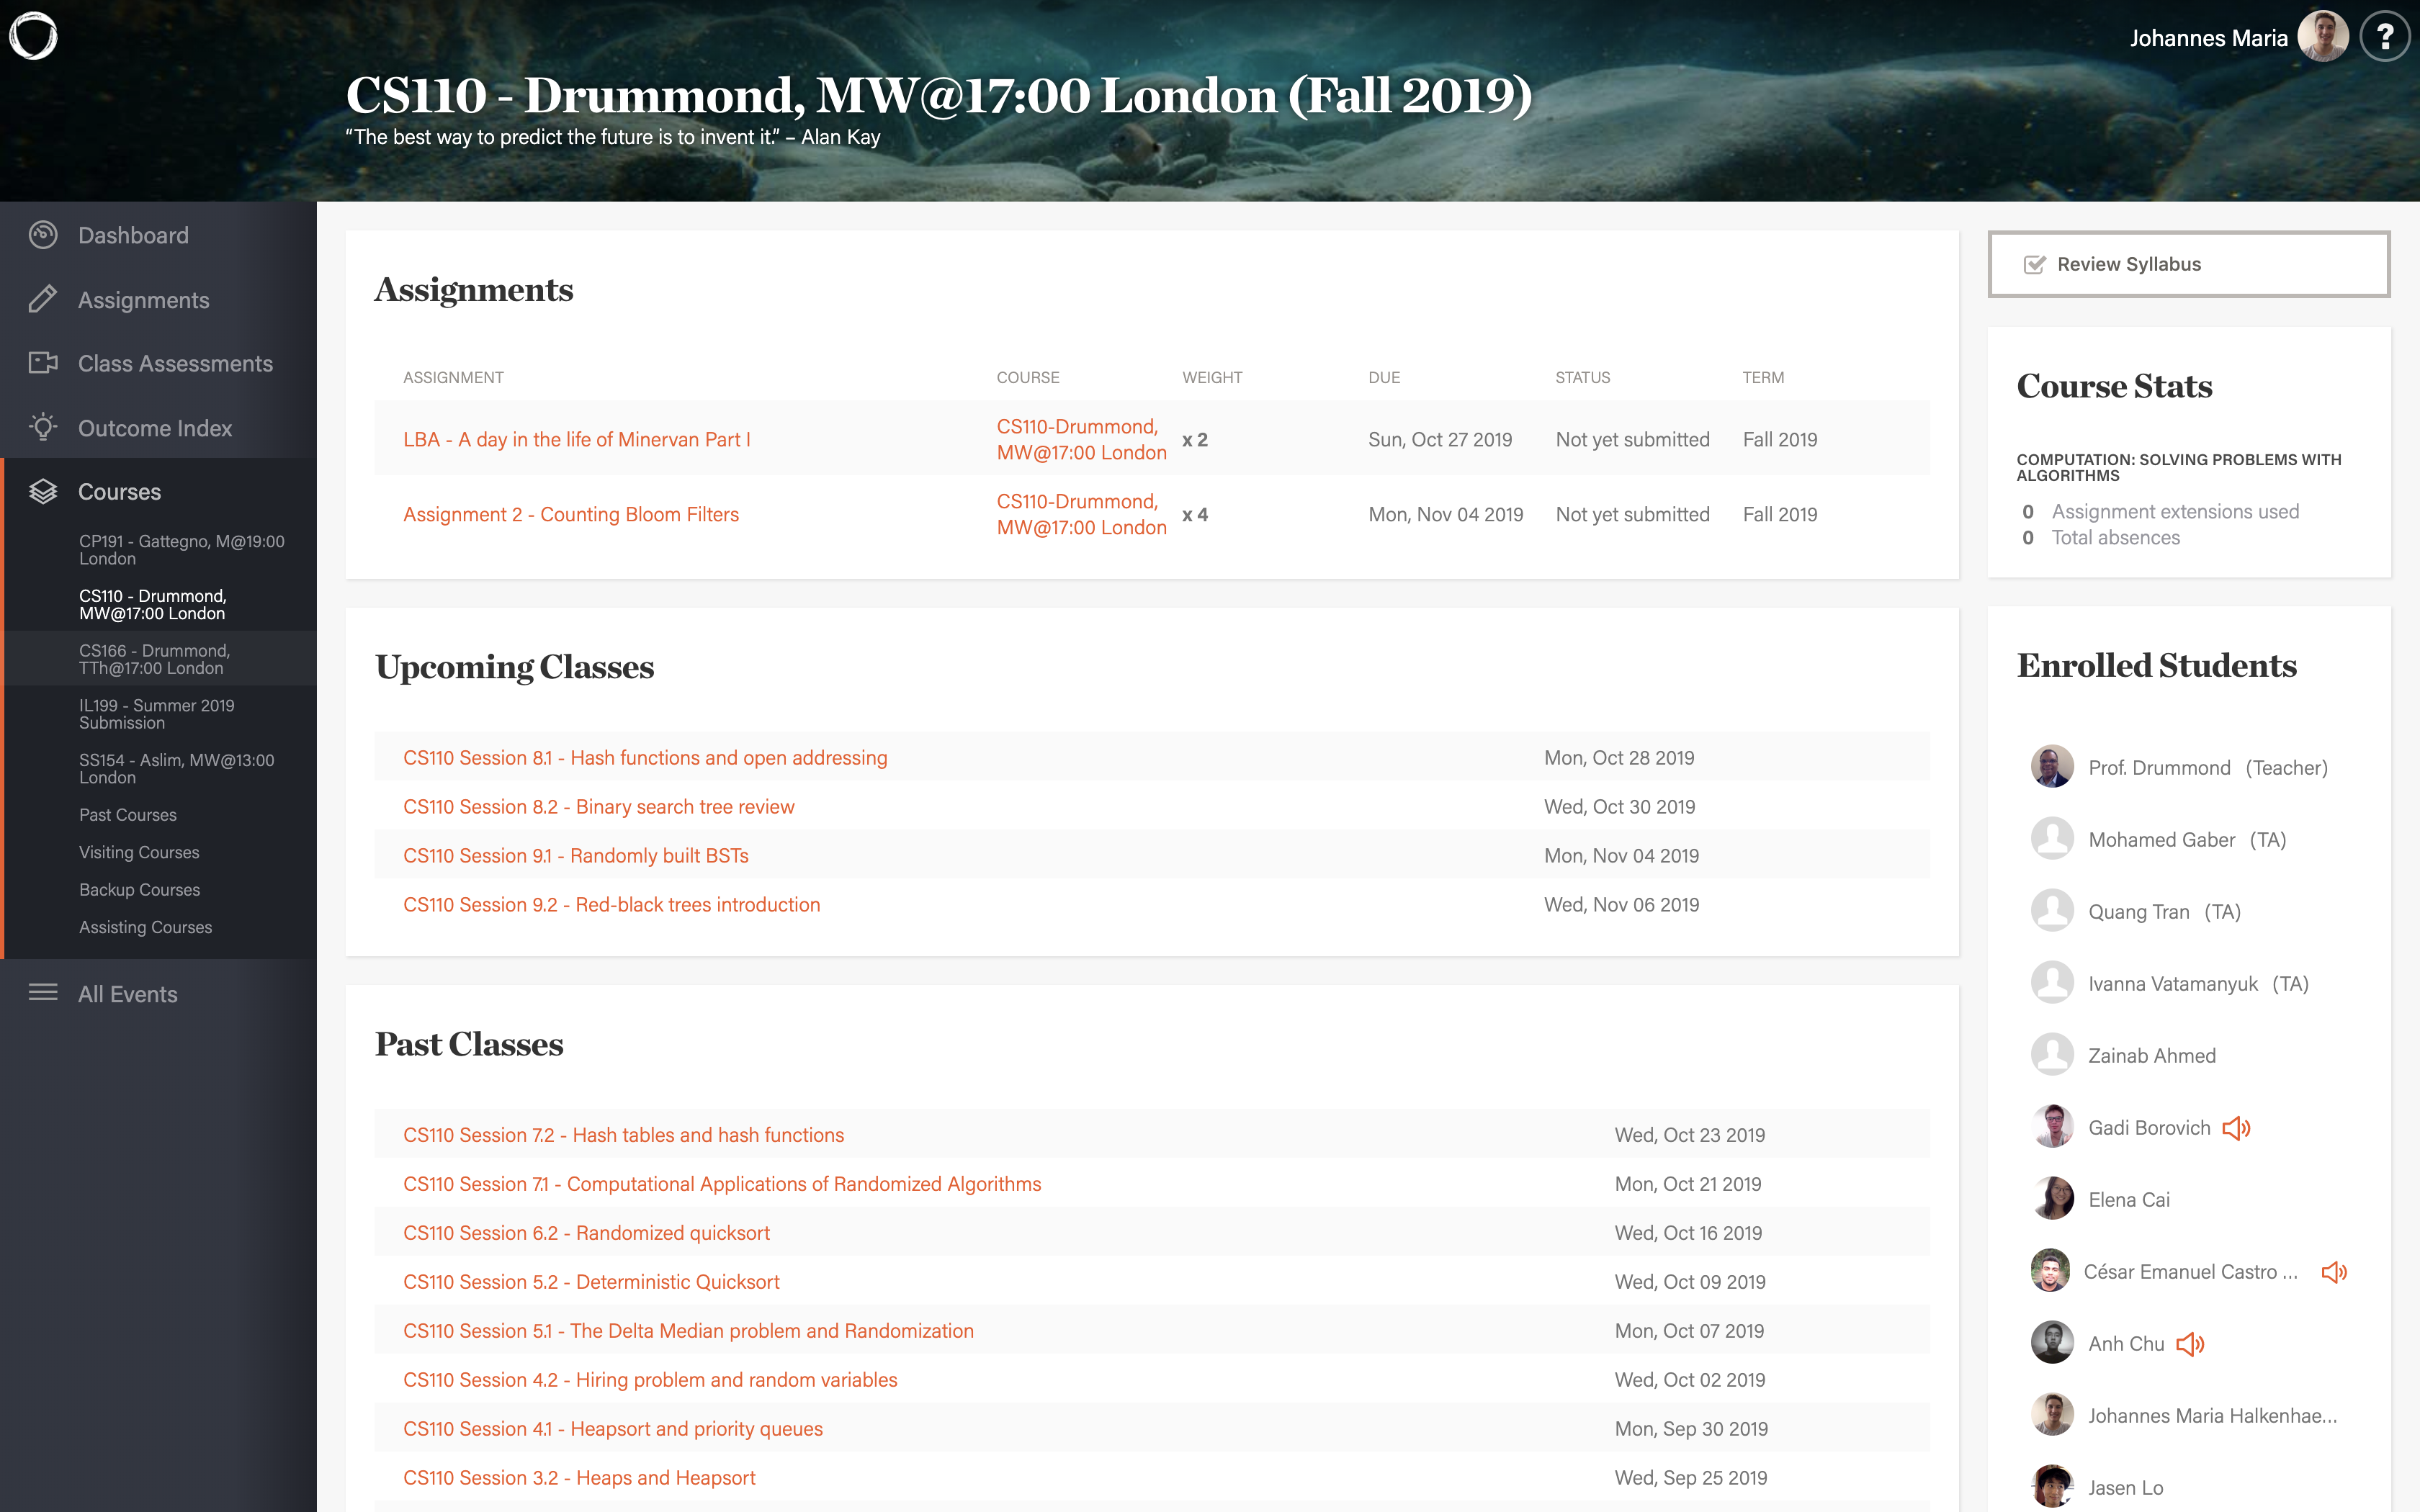

In [19]:
from PIL import Image

img  = Image.open("/Users/johannes/Desktop/Screenshot 2019-10-26 at 22.26.51.png")
img

In [1]:
import random
import math
import matplotlib.pyplot as plt
import time

In [20]:
## A day in the life ## 

Tasks = [[4, "Listening to NPR Podcast", 20, True, [], "NYS",[]],
 [5, "Having deep thoughts about the life of a Minervan", 5, True, [4],"NYS",[]],
 [6, "Bumping into friend from primary school", 1, True, [13,12,11], "NYS",[]],
 [7, "Discussing Bundesliga (German Football)", 10, True, [6, 13,12,11], "NYS",[]],
 [8, "(Internally) complaining about the weather (It is an LBA about Germany...)", 20, True, [4,5], "NYS", []],
 [9, "Biking Home", 30, True, [4,5,6,7,8,11,12,13,14,21,22,23,24,31,32,33,41,42,43,44,51,52,53], "NYS", []],
 [11, "Riding bike to Prenzlauer Berg", 15, True, [], "NYS",[]],
 [12, "Having brunch at Zuckerfee-Café", 60, False, [11], "NYS",[]],
 [13, "Paying", 2, False, [12,11], "NYS",[]],
 [14, "Discussing the music", 10, True, [11], "NYS", []],
 
 [21, "Walking to Mauerpark", 10, True, [14,13,12,11], "NYS",[]],
 [22, "Looking at vendors on street 1", 20, True, [21,14,13,12,11], "NYS",[]],
 [23, "Deciding not to buy anything", 1, True, [22,21,14,13,12,11], "NYS",[]],
 [24, "Changing mind and buy Korean street food", 5, False, [23,22,21,14,13,12,11], "NYS",[]],
 
 [31, "Going to a thriftstore", 18, True, [14,13,12,11],"NYS",[]],
 [32, "Selecting item of clothing", 20, True, [31, 14,13,12,11], "NYS", []],
 [33, "Thinking about movie to watch", 20, True, [31,14,13,12,11], "NYS", []],
 
 [41, "Contemplating Lunch choices", 3, True, [14,13,12,11], "NYS", []],
 [42, "Getting on U-Bahn", 1, False, [41,14,13,12,11], "NYS", []],
 [43, "Getting off U-Bahn", 14, False,  [42,41,14,13,12,11], "NYS", []],
 [44, "Looking at U-Bahn Weinmeisterstrasse",1,False, [43,42,41,14,13,12,11], "NYS", []],
 
 [51, "Ordering Burrito at Dolores Burritos", 15, False, [44, 43,42,41,14,13,12,11], "NYS", []],
 [52, "Eating Burrito", 20, True, [51,44,43,42,41,14,13,12,11], "NYS",[]],
 [53, "Walking back to Bike", 20, True, [51, 52, 44, 43,42,41,14,13,12,11], "NYS", []]]



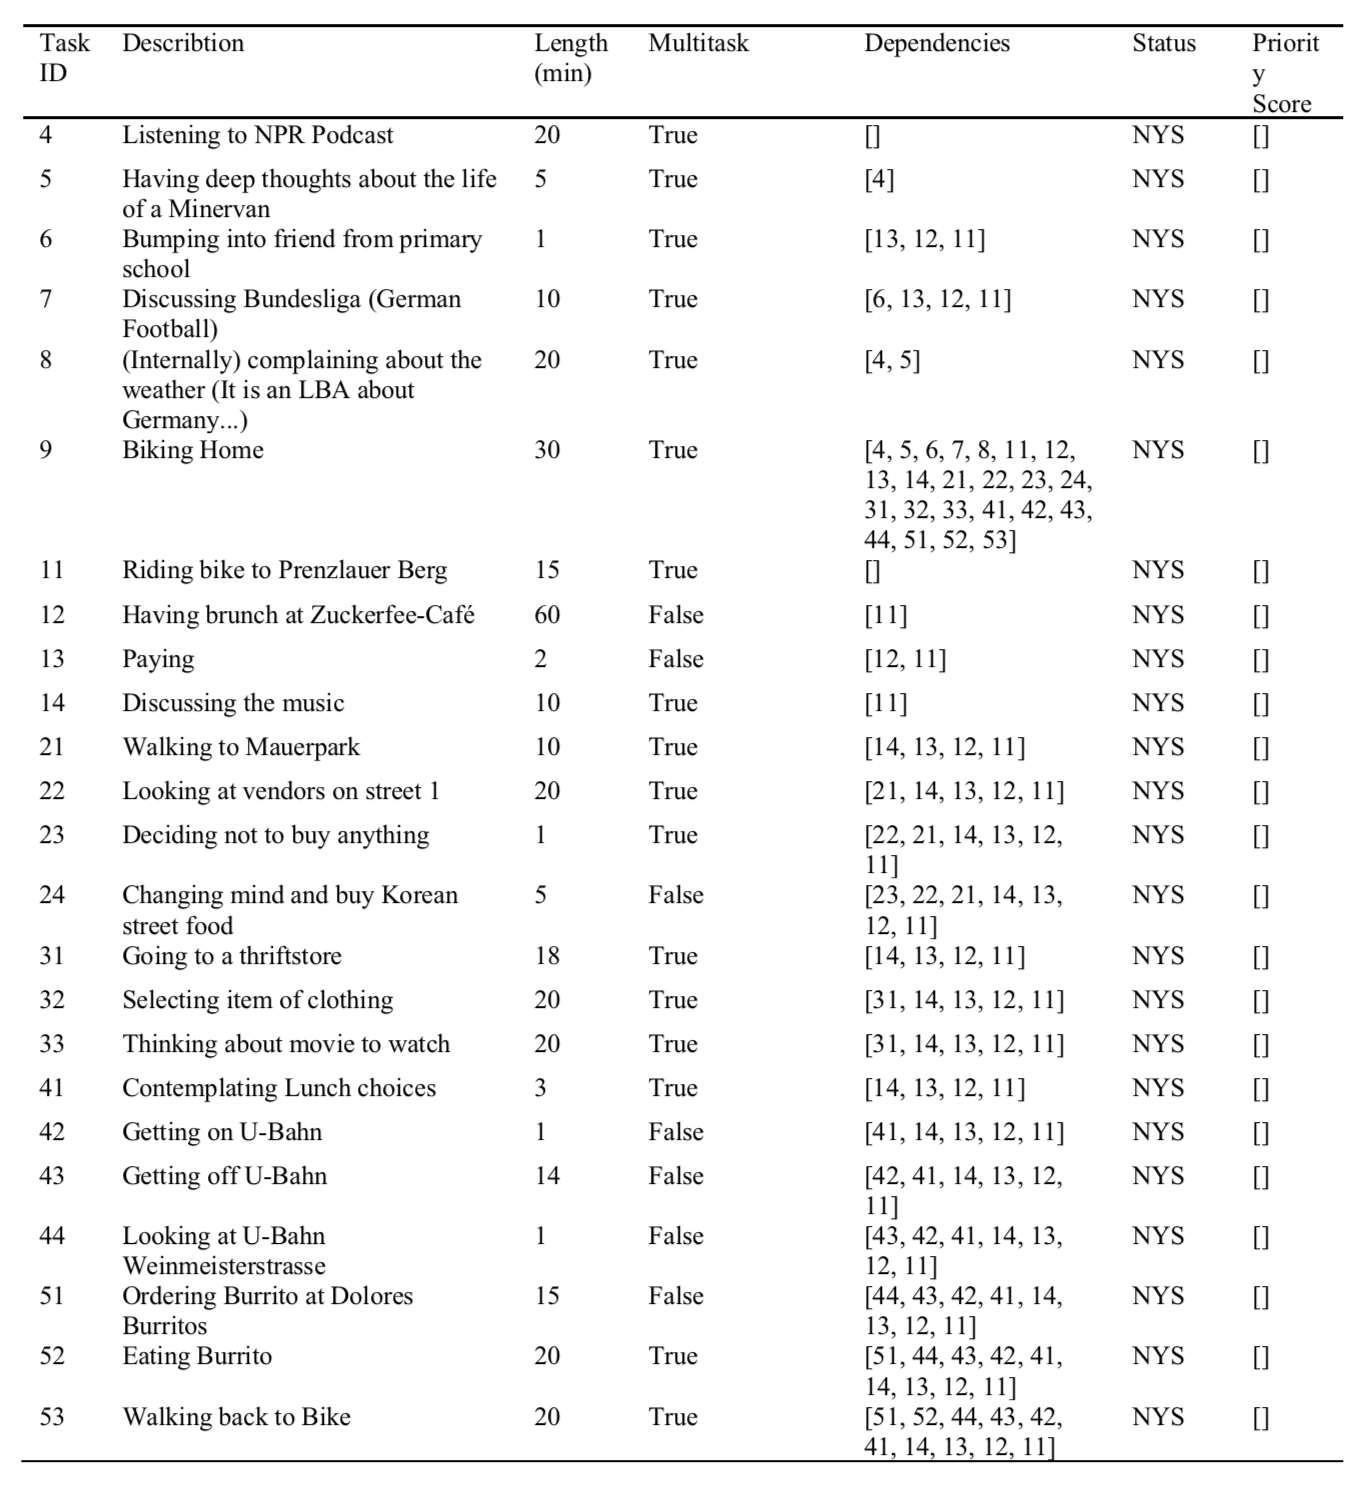

In [22]:
tab  = Image.open("/Users/johannes/Desktop/Screenshot 2019-10-26 at 22.35.33.png")
tab

### Justification of Tasks ###

I really like the neighborhood of Prenzlauer Berg in the North of Berlin so my activities are located in that neighborhood. The day includes me going to Prenzlauer Berg, having brunch there, visit a Park), going to a thriftstore, and riding the U-Bahn - all very German things to do. During the day I eat food from other Minerva cities such as Korean street food and Burritos from a San Francisco-themed burrito restaurant. The other tasks such as discussing Football or thinking about the weather are activities, I as a German will do on a daily basis so felt fitting for a German LBA. Mauerpark is a significant place in Berlin because the park is built where the former Berlin wall and death zone were (Mauer = Wall). Now it is a bustling hang out spots to do sports, have a BBQ or visit the fleamarket on Sundays. It signifies the open and colorful Berlin culture of today.

In [5]:
##max heap for determining the next task

# 
# Defining some basic binary tree functions
#
def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent


# Defining the Python class MaxHeapq to implement a max heap data structure.
# Every Object in this class has two attributes:
#           - heap : A Python list where key values in the max heap are stored
#           - heap_size: An integer counter of the number of keys present in the max heap
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method. Use: heapq_var = MaxHeapq()
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0
        self.Done       = []

    # This method returns the highest key in the priority queue. 
    #   Use: key_var = heapq_var.max()
    def maxk(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    #   Use: heapq_var.heappush(key)
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        priority_function(key)
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the INCREASE_KEY operation, which modifies the value of a key
    # in the max priority queue with a higher value. 
    #   Use heapq_var.increase_key(i, new_key)
    def increase_key(self, i, key): 
        if key[6] < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)][6] < self.heap[i][6]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    #   Use heapq_var.heapify(i)        
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size -1) and heap[l][6] > heap[i][6]:
            largest = l
        
        else:
            largest = i
            
        if r <= (self.heap_size -1) and heap[r][6] > heap[largest][6]:
            largest = r
        
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)
            
    

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    #   Use key_var = heapq_var.heappop() 
    def heappop(self, location):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[location]
        self.heap[location] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(location)
        return maxk
    
    def overview(self):
        display = [(self.heap[i][0],self.heap[i][6], self.heap[i][3]) for i in range(len(self.heap))]

In [6]:
#find priority of each task
def priority_function(task):
    if type(task) == int:
        return task
    
    prio_value = 0
    
    #count number of dependencies
    for t in Tasks:
        
        if task[0] in t[4]:
            prio_value += 1
            
            
    #if task is multitasking we up it's priority (this makes the)   
    if task[3] == True:
        prio_value = 2*prio_value
    
    #add the task into an extra cell in the priority function
    task[6] = prio_value
    return prio_value

#### Function with greatest common Divisor

In [7]:
##Define my tasks of the day

Tasks = [[4, "Listening to NPR Podcast", 20, True, [], "NYS",[]],
 [5, "Having deep thoughts about the life of a Minervan", 5, True, [4],"NYS",[]],
 [6, "Bumping into friend from primary school", 1, True, [13,12,11], "NYS",[]],
 [7, "Discussing Bundesliga (German Football)", 10, True, [6, 13,12,11], "NYS",[]],
 [8, "(Internally) complaining about the weather (It is an LBA about Germany...)", 20, True, [4,5], "NYS", []],
 [9, "Biking Home", 30, True, [4,5,6,7,8,11,12,13,14,21,22,23,24,31,32,33,41,42,43,44,51,52,53], "NYS", []],
 [11, "Riding bike to Prenzlauer Berg", 15, True, [], "NYS",[]],
 [12, "Having brunch at Zuckerfee-Café", 60, False, [11], "NYS",[]],
 [13, "Paying", 2, False, [12,11], "NYS",[]],
 [14, "Discussing the music", 10, True, [11], "NYS", []],
 
 [21, "Walking to Mauerpark", 10, True, [14,13,12,11], "NYS",[]],
 [22, "Looking at vendors on street 1", 20, True, [21,14,13,12,11], "NYS",[]],
 [23, "Deciding not to buy anything", 1, True, [22,21,14,13,12,11], "NYS",[]],
 [24, "Changing mind and buy Korean street food", 5, False, [23,22,21,14,13,12,11], "NYS",[]],
 
 [31, "Going to a thriftstore", 18, True, [14,13,12,11],"NYS",[]],
 [32, "Selecting item of clothing", 20, True, [31, 14,13,12,11], "NYS", []],
 [33, "Thinking about movie to watch", 20, True, [31,14,13,12,11], "NYS", []],
 
 [41, "Contemplating Lunch choices", 3, True, [14,13,12,11], "NYS", []],
 [42, "Getting on U-Bahn", 1, False, [41,14,13,12,11], "NYS", []],
 [43, "Getting off U-Bahn", 14, False,  [42,41,14,13,12,11], "NYS", []],
 [44, "Looking at U-Bahn Weinmeisterstrasse",1,False, [43,42,41,14,13,12,11], "NYS", []],
 
 [51, "Ordering Burrito at Dolores Burritos", 15, False, [44, 43,42,41,14,13,12,11], "NYS", []],
 [52, "Eating Burrito", 20, True, [51,44,43,42,41,14,13,12,11], "NYS",[]],
 [53, "Walking back to Bike", 20, True, [51, 52, 44, 43,42,41,14,13,12,11], "NYS", []]]



#Running the whole thing
def main(Tasks):
    #random.shuffle(Tasks)
    pQ = MaxHeapq()
    
    def initialize(pQ):
        for task in Tasks:
            pQ.heappush(task[:])
        return pQ
            
    def find_next(start_index, multitask):
    
        #for each task in the queue
        for index in list(range(start_index, len(pQ.heap))):

            #get the entire task at the current index
            task = pQ.heap[index]
            
            if task[3] not in multitask:
                continue

            #check if dependencies are executed
            deps_done = 0

            #Check if the elemets in the dependencies
            for t in task[4]:

                #are in the list of done elements
                if t in pQ.Done:

                    deps_done += 1

            #dependencies done?
            if deps_done == len(task[4]):
                #if all dependencies are done, return that index and finish the for-loop
                return index
    
    def execute_next(current_time):
    
        to_be_executed = find_next(0, [True, False])

        #update status
        pQ.heap[to_be_executed][5] = 'IP'

        #pop the task and maintain heap structure
        task_1 = pQ.heappop(to_be_executed)

        #if multitask
        if task_1[3] == True and len(pQ.heap) > 0:
            
            #Look for the next multitask after the current multi-task. All before that could not be executed.
            multi = find_next(to_be_executed, [True])
    
            #should there be no other multitask
            if multi is None:
                pQ.Done.append(task_1[0])
                task_1[5] = "Completed"
                current_time += task_1[2]
                print(f"Finished {task_1[1]} after {task_1[2]} minutes")
                return current_time

            #update status
            pQ.heap[multi][5] = 'IP'

            task_2 = pQ.heappop(multi)

            #use the math.gcd() function to find the greatest common divisor of their times
            divider = math.gcd(task_1[2],task_2[2])
            print(f"Tasks are partitioned into chunks of {divider} minutes")
            #record the time it takes for tasks to be done
            time_to_execute = 0

            #do tasks
            while task_1[2] > 0 or task_2[2] > 0:

                #if neither task is done do both
                if task_1[2] > 0 and task_2[2] > 0:

                    task_1[2] -= divider
                    task_2[2] -= divider

                    print(f"Executing: {task_1[1]} with remaining time {task_1[2]}")
                    print(f"Executing: {task_2[1]} with remaining time {task_2[2]}")

                    time_to_execute += divider*2

                #finish the uncompleted task
                elif task_1[2] > 0 and task_2[2] <= 0:
                    time_to_execute += task_1[2]
                    task_1[2] -= task_1[2]


                else:
                    time_to_execute += task_2[2]
                    task_2[2] -= task_2[2]



            #Proclaim the success of finishing the tasks
            pQ.Done.append(task_1[0])
            pQ.Done.append(task_2[0])
            print(f"Finished {task_1[1]} and {task_2[1]} after {time_to_execute} minutes")

            current_time += time_to_execute
            return current_time

        else:
            pQ.Done.append(task_1[0])
            task_1[5] = "Completed"
            current_time += task_1[2]
            print(f"Finished {task_1[1]} after {task_1[2]} minutes")
            return current_time       
            
    #create pQ as part of the class
    initialize(pQ)


    #Consider me getting my day started at 9am:
    current_time = 540

    while len(pQ.Done) != len(Tasks):
        current_time = execute_next(current_time)

        print(f"The current time is {math.floor(current_time/60)}:{current_time%60}")
        
main(Tasks)

Tasks are partitioned into chunks of 5 minutes
Executing: Riding bike to Prenzlauer Berg with remaining time 10
Executing: Listening to NPR Podcast with remaining time 15
Executing: Riding bike to Prenzlauer Berg with remaining time 5
Executing: Listening to NPR Podcast with remaining time 10
Executing: Riding bike to Prenzlauer Berg with remaining time 0
Executing: Listening to NPR Podcast with remaining time 5
Finished Riding bike to Prenzlauer Berg and Listening to NPR Podcast after 35 minutes
The current time is 9:35
Tasks are partitioned into chunks of 5 minutes
Executing: Discussing the music with remaining time 5
Executing: Having deep thoughts about the life of a Minervan with remaining time 0
Finished Discussing the music and Having deep thoughts about the life of a Minervan after 15 minutes
The current time is 9:50
Finished Having brunch at Zuckerfee-Café after 60 minutes
The current time is 10:50
Finished Paying after 2 minutes
The current time is 10:52
Tasks are partitioned

#### Taking out all the print statements to reduce overhear

In [8]:
##Define my tasks of the day

Tasks = [[4, "Listening to NPR Podcast", 20, True, [], "NYS",[]],
 [5, "Having deep thoughts about the life of a Minervan", 5, True, [4],"NYS",[]],
 [6, "Bumping into friend from primary school", 1, True, [13,12,11], "NYS",[]],
 [7, "Discussing Bundesliga (German Football)", 10, True, [6, 13,12,11], "NYS",[]],
 [8, "(Internally) complaining about the weather (It is an LBA about Germany...)", 20, True, [4,5], "NYS", []],
 [9, "Biking Home", 30, True, [4,5,6,7,8,11,12,13,14,21,22,23,24,31,32,33,41,42,43,44,51,52,53], "NYS", []],
 [11, "Riding bike to Prenzlauer Berg", 15, True, [], "NYS",[]],
 [12, "Having brunch at Zuckerfee-Café", 60, False, [11], "NYS",[]],
 [13, "Paying", 2, False, [12,11], "NYS",[]],
 [14, "Discussing the music", 10, True, [11], "NYS", []],
 
 [21, "Walking to Mauerpark", 10, True, [14,13,12,11], "NYS",[]],
 [22, "Looking at vendors on street 1", 20, True, [21,14,13,12,11], "NYS",[]],
 [23, "Deciding not to buy anything", 1, True, [22,21,14,13,12,11], "NYS",[]],
 [24, "Changing mind and buy Korean street food", 5, False, [23,22,21,14,13,12,11], "NYS",[]],
 
 [31, "Going to a thriftstore", 18, True, [14,13,12,11],"NYS",[]],
 [32, "Selecting item of clothing", 20, True, [31, 14,13,12,11], "NYS", []],
 [33, "Thinking about movie to watch", 20, True, [31,14,13,12,11], "NYS", []],
 
 [41, "Contemplating Lunch choices", 3, True, [14,13,12,11], "NYS", []],
 [42, "Getting on U-Bahn", 1, False, [41,14,13,12,11], "NYS", []],
 [43, "Getting off U-Bahn", 14, False,  [42,41,14,13,12,11], "NYS", []],
 [44, "Looking at U-Bahn Weinmeisterstrasse",1,False, [43,42,41,14,13,12,11], "NYS", []],
 
 [51, "Ordering Burrito at Dolores Burritos", 15, False, [44, 43,42,41,14,13,12,11], "NYS", []],
 [52, "Eating Burrito", 20, True, [51,44,43,42,41,14,13,12,11], "NYS",[]],
 [53, "Walking back to Bike", 20, True, [51, 52, 44, 43,42,41,14,13,12,11], "NYS", []]]

#Running the whole thing
def main_no_print(Tasks):
    
    pQ = MaxHeapq()
    
    def initialize(pQ):
        for task in Tasks:
            pQ.heappush(task[:])
        return pQ
            
    def find_next(start_index, multitask):
    
        #for each task in the queue
        for index in list(range(start_index, len(pQ.heap))):

            #get the entire task at the current index
            task = pQ.heap[index]
            
            if task[3] not in multitask:
                continue

            #check if dependencies are executed
            deps_done = 0

            #Check if the elemets in the dependencies
            for t in task[4]:

                #are in the list of done elements
                if t in pQ.Done:

                    deps_done += 1

            #dependencies done?
            if deps_done == len(task[4]):
                #if all dependencies are done, return that index and finish the for-loop
                return index
    
    def execute_next(current_time):
    
        to_be_executed = find_next(0, [True, False])

        #update status
        pQ.heap[to_be_executed][5] = 'IP'

        #pop the task and maintain heap structure
        task_1 = pQ.heappop(to_be_executed)

        #if multitask
        if task_1[3] == True and len(pQ.heap) > 0:
            
            #Look for the next multitask after the current multi-task. All before that could not be executed.
            multi = find_next(to_be_executed, [True])
    
            #should there be no other multitask
            if multi is None:
                pQ.Done.append(task_1[0])
                task_1[5] = "Completed"
                current_time += task_1[2]
                
                return current_time

            #update status
            pQ.heap[multi][5] = 'IP'

            task_2 = pQ.heappop(multi)

            #use the math.gcd() function to find the greatest common divisor of their times
            divider = math.gcd(task_1[2],task_2[2])
            
            #record the time it takes for tasks to be done
            time_to_execute = 0

            #do tasks
            while task_1[2] > 0 or task_2[2] > 0:

                #if neither task is done do both
                if task_1[2] > 0 and task_2[2] > 0:

                    task_1[2] -= divider
                    task_2[2] -= divider

                    time_to_execute += divider*2

                #finish the uncompleted task
                elif task_1[2] > 0 and task_2[2] <= 0:
                    time_to_execute += task_1[2]
                    task_1[2] -= task_1[2]


                else:
                    time_to_execute += task_2[2]
                    task_2[2] -= task_2[2]



            #Proclaim the success of finishing the tasks
            pQ.Done.append(task_1[0])
            pQ.Done.append(task_2[0])
            

            current_time += time_to_execute
            return current_time

        else:
            pQ.Done.append(task_1[0])
            task_1[5] = "Completed"
            current_time += task_1[2]
            
            return current_time       
            
    #create pQ as part of the class
    initialize(pQ)


    #Consider me getting my day started at 9am:
    current_time = 540

    while len(pQ.Done) != len(Tasks):
        current_time = execute_next(current_time)

main_no_print(Tasks)

Text(0, 0.5, 'Frequency')

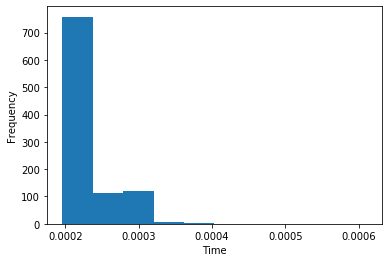

In [9]:
times_gdc = []
for _ in range(1000):
    random.shuffle(Tasks)
    start = time.time()
    main_no_print(Tasks)
    times_gdc.append(time.time() - start)
    
    
plt.hist(times_gdc)
plt.xlabel("Time")
plt.ylabel("Frequency")

#### Using a random number in between 1 and the greater of the two tasks as partitioning

In [10]:
##Define my tasks of the day

Tasks = [[4, "Listening to NPR Podcast", 20, True, [], "NYS",[]],
 [5, "Having deep thoughts about the life of a Minervan", 5, True, [4],"NYS",[]],
 [6, "Bumping into friend from primary school", 1, True, [13,12,11], "NYS",[]],
 [7, "Discussing Bundesliga (German Football)", 10, True, [6, 13,12,11], "NYS",[]],
 [8, "(Internally) complaining about the weather (It is an LBA about Germany...)", 20, True, [4,5], "NYS", []],
 [9, "Biking Home", 30, True, [4,5,6,7,8,11,12,13,14,21,22,23,24,31,32,33,41,42,43,44,51,52,53], "NYS", []],
 [11, "Riding bike to Prenzlauer Berg", 15, True, [], "NYS",[]],
 [12, "Having brunch at Zuckerfee-Café", 60, False, [11], "NYS",[]],
 [13, "Paying", 2, False, [12,11], "NYS",[]],
 [14, "Discussing the music", 10, True, [11], "NYS", []],
 
 [21, "Walking to Mauerpark", 10, True, [14,13,12,11], "NYS",[]],
 [22, "Looking at vendors on street 1", 20, True, [21,14,13,12,11], "NYS",[]],
 [23, "Deciding not to buy anything", 1, True, [22,21,14,13,12,11], "NYS",[]],
 [24, "Changing mind and buy Korean street food", 5, False, [23,22,21,14,13,12,11], "NYS",[]],
 
 [31, "Going to a thriftstore", 18, True, [14,13,12,11],"NYS",[]],
 [32, "Selecting item of clothing", 20, True, [31, 14,13,12,11], "NYS", []],
 [33, "Thinking about movie to watch", 20, True, [31,14,13,12,11], "NYS", []],
 
 [41, "Contemplating Lunch choices", 3, True, [14,13,12,11], "NYS", []],
 [42, "Getting on U-Bahn", 1, False, [41,14,13,12,11], "NYS", []],
 [43, "Getting off U-Bahn", 14, False,  [42,41,14,13,12,11], "NYS", []],
 [44, "Looking at U-Bahn Weinmeisterstrasse",1,False, [43,42,41,14,13,12,11], "NYS", []],
 
 [51, "Ordering Burrito at Dolores Burritos", 15, False, [44, 43,42,41,14,13,12,11], "NYS", []],
 [52, "Eating Burrito", 20, True, [51,44,43,42,41,14,13,12,11], "NYS",[]],
 [53, "Walking back to Bike", 20, True, [51, 52, 44, 43,42,41,14,13,12,11], "NYS", []]]


#Running the whole thing
def main(Tasks):
    
    pQ = MaxHeapq()
    
    def initialize(pQ):
        for task in Tasks:
            pQ.heappush(task[:])
        return pQ
            
    def find_next(start_index, multitask):
    
        #for each task in the queue
        for index in list(range(start_index, len(pQ.heap))):

            #get the entire task at the current index
            task = pQ.heap[index]
            
            if task[3] not in multitask:
                continue

            #check if dependencies are executed
            deps_done = 0

            #Check if the elemets in the dependencies
            for t in task[4]:

                #are in the list of done elements
                if t in pQ.Done:

                    deps_done += 1

            #dependencies done?
            if deps_done == len(task[4]):
                #if all dependencies are done, return that index and finish the for-loop
                return index
    
    def execute_next(current_time):
    
        to_be_executed = find_next(0, [True, False])

        #update status
        pQ.heap[to_be_executed][5] = 'IP'

        #pop the task and maintain heap structure
        task_1 = pQ.heappop(to_be_executed)

        #if multitask
        if task_1[3] == True and len(pQ.heap) > 0:

            #Look for the next multitask after the current multi-task. All before that could not be executed.
            multi = find_next(to_be_executed, [True])
    
            #should there be no other multitask
            if multi is None:
                pQ.Done.append(task_1[0])
                task_1[5] = "Completed"
                current_time += task_1[2]
                print(f"Finished {task_1[1]} after {task_1[2]} minutes")
                return current_time

            #update status
            pQ.heap[multi][5] = 'IP'

            task_2 = pQ.heappop(multi)

            #use the random to find a random divider in the range between 1 and the greater task length
            divider = random.randrange(1, max([task_1[2],task_2[2]])+1)
            print(f"Tasks are partitioned into chunks of {divider} minutes")
            #record the time it takes for tasks to be done
            time_to_execute = 0

            #do tasks
            while task_1[2] > 0 or task_2[2] > 0:

                #if neither task is done do both
                if task_1[2] > 0 and task_2[2] > 0:

                    task_1[2] -= divider
                    task_2[2] -= divider

                    print(f"Executing: {task_1[1]} with remaining time {task_1[2]}")
                    print(f"Executing: {task_2[1]} with remaining time {task_2[2]}")

                    time_to_execute += divider*2

                #finish the uncompleted task
                elif task_1[2] > 0 and task_2[2] <= 0:
                    time_to_execute += task_1[2]
                    task_1[2] -= task_1[2]


                else:
                    time_to_execute += task_2[2]
                    task_2[2] -= task_2[2]



            #Proclaim the success of finishing the tasks
            pQ.Done.append(task_1[0])
            pQ.Done.append(task_2[0])
            print(f"Finished {task_1[1]} and {task_2[1]} after {time_to_execute} minutes")

            current_time += time_to_execute
            return current_time

        else:
            pQ.Done.append(task_1[0])
            task_1[5] = "Completed"
            current_time += task_1[2]
            print(f"Finished {task_1[1]} after {task_1[2]} minutes")
            return current_time       
            
    #create pQ as part of the class
    initialize(pQ)

    #Consider me getting my day started at 9am:
    current_time = 540

    
    while len(pQ.Done) != len(Tasks):
        
        current_time = execute_next(current_time)

        print(f"The current time is {math.floor(current_time/60)}:{current_time%60}")
    
main(Tasks)

Tasks are partitioned into chunks of 1 minutes
Executing: Riding bike to Prenzlauer Berg with remaining time 14
Executing: Listening to NPR Podcast with remaining time 19
Executing: Riding bike to Prenzlauer Berg with remaining time 13
Executing: Listening to NPR Podcast with remaining time 18
Executing: Riding bike to Prenzlauer Berg with remaining time 12
Executing: Listening to NPR Podcast with remaining time 17
Executing: Riding bike to Prenzlauer Berg with remaining time 11
Executing: Listening to NPR Podcast with remaining time 16
Executing: Riding bike to Prenzlauer Berg with remaining time 10
Executing: Listening to NPR Podcast with remaining time 15
Executing: Riding bike to Prenzlauer Berg with remaining time 9
Executing: Listening to NPR Podcast with remaining time 14
Executing: Riding bike to Prenzlauer Berg with remaining time 8
Executing: Listening to NPR Podcast with remaining time 13
Executing: Riding bike to Prenzlauer Berg with remaining time 7
Executing: Listening to

#### No print to reduce overhead

In [11]:
#Running the whole thing
def main_no_print(Tasks):
    
    pQ = MaxHeapq()
    
    def initialize(pQ):
        for task in Tasks:
            pQ.heappush(task[:])
        return pQ
            
    def find_next(start_index, multitask):
    
        #for each task in the queue
        for index in list(range(start_index, len(pQ.heap))):

            #get the entire task at the current index
            task = pQ.heap[index]
            
            if task[3] not in multitask:
                continue

            #check if dependencies are executed
            deps_done = 0

            #Check if the elemets in the dependencies
            for t in task[4]:

                #are in the list of done elements
                if t in pQ.Done:

                    deps_done += 1

            #dependencies done?
            if deps_done == len(task[4]):
                #if all dependencies are done, return that index and finish the for-loop
                return index
    
    def execute_next(current_time):
    
        to_be_executed = find_next(0, [True, False])

        #update status
        pQ.heap[to_be_executed][5] = 'IP'

        #pop the task and maintain heap structure
        task_1 = pQ.heappop(to_be_executed)

        #if multitask
        if task_1[3] == True and len(pQ.heap) > 0:
            
            #Look for the next multitask after the current multi-task. All before that could not be executed.
            multi = find_next(to_be_executed, [True])
    
            #should there be no other multitask
            if multi is None:
                pQ.Done.append(task_1[0])
                task_1[5] = "Completed"
                current_time += task_1[2]
                return current_time

            #update status
            pQ.heap[multi][5] = 'IP'

            task_2 = pQ.heappop(multi)

            #use the random to find a random divider in the range between 1 and the greater task length
            divider = random.randrange(1, max([task_1[2],task_2[2]])+1)
            
            #record the time it takes for tasks to be done
            time_to_execute = 0

            #do tasks
            while task_1[2] > 0 and task_2[2] > 0:

                #if neither task is done do both
                if task_1[2] > 0 and task_2[2] > 0:

                    task_1[2] -= divider
                    task_2[2] -= divider

                    time_to_execute += divider*2

                #finish the uncompleted task
                elif task_1[2] > 0 and task_2[2] <= 0:
                    time_to_execute += task_1[2]
                    task_1[2] -= task_1[2]


                else:
                    time_to_execute += task_2[2]
                    task_2[2] -= task_2[2]



            #Proclaim the success of finishing the tasks
            pQ.Done.append(task_1[0])
            pQ.Done.append(task_2[0])
            current_time += time_to_execute
            return current_time

        else:
            pQ.Done.append(task_1[0])
            task_1[5] = "Completed"
            current_time += task_1[2]
            return current_time       
            
    #create pQ as part of the class
    initialize(pQ)

    #Consider me getting my day started at 9am:
    current_time = 540

    while len(pQ.Done) != len(Tasks):
        current_time = execute_next(current_time)
    return current_time    

main_no_print(Tasks)

892

Average end time: 15:15


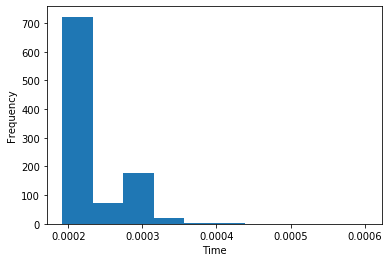

In [12]:
times_random = []
end_time = []

for _ in range(1000):
    random.shuffle(Tasks)
    start = time.time()
    end_time.append(main_no_print(Tasks))
    times_random.append(time.time() - start)
    
    
    
plt.hist(times_random)
plt.xlabel("Time")
plt.ylabel("Frequency")
print(f"Average end time: {math.floor(sum(end_time)/60000)}:{sum(end_time)//60000}")

Average run time Random: 0.0023563838005065917 
 Average run time GDC: 0.0022760128974914553


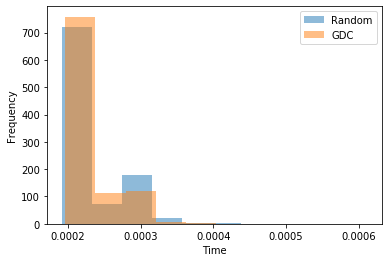

In [13]:
plt.hist(times_random, alpha = 0.5)
plt.hist(times_gdc, alpha = 0.5)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(("Random", "GDC"))

print(f"Average run time Random: {sum(times_random)/100} \n Average run time GDC: {sum(times_gdc)/100}")

## Analysis

While my scheduler successfully executes and schedules the different activities there are certain parts that could be optimized or need some practical improvement. 

Using a max heap function lets us increase the probability of finding the next best task in the first few indeces when iterating through the possible tasks to be executed. Using the heap structure lets any priority queue function be executed in $O(log (n))$ time. Building the heap costs $O(n)$ time as each element is inserted. I have improved my priority queue slightly because when I pop out the task or sub-task, I only heapify the sub-tree below that has the current task as a root. This makes the algorithm more efficient. Using the heap structure also means that we can perform this heapifying of just the sub-trees, if we were sorting it we would resort the entire array. 
A disadvantage of the heap structure is that the ultimate order of elements depends on the way they given as input. E.g. I have three priority scores: [10, 2, 3, 0, 0,0,1]; then the heap would be exactly this array. If now the first task 10 is a multi-task, then the heap changes to [2, 1, 3, 0, 0, 0] after 10 is popped. If 2 was not a multi-task and 1 and 3 were, 1 would be paired with 10 even though 3 has the higher priority score. This happens simply by virtue of the input order. I minimized this input-dependence in my timed versions by shuffling the input array.

Following the algorithmic directives means that the priority is given to how many dependencies a task has or if the task has multitasking abilities. I chose this strategy because it seemed like it would minimize the search time within the heap until a task that is ready to be executed comes up. I.e. tasks with many dependencies have at least one dependency less than all task depending on it and we can likely avoid getting a task that requires many dependencies many tasks to be completed to be high up in the heap. My priority function also considers whether is a task is multitasking. That's because I wanted tasks that are multitasking to be high up on the heap because every case there is a multitask I have to also look for a multitask. Increasing their priority score by a factor of 2 made them stand out against the monotasks. This factor of two is fixed here but could certainly be optimized on as there is a trade-off between giving high-dependency and multi-tasks priority. 

Going just by dependencies and multitasks also limites the real-life applicability. Some tasks can for example be multitasked together but should be a monottask with a different pairing: e.g. "biking" and "having deep thoughts" can be combined but "having deep thoughts" and "(internally) complaining about the weather" are both tasks requiring just thinking so in a more ideal algorithm, there would be a new column that includes tasks that are non-pairable/pairable with the task at hand. 

##### Multitasking - Two approaches

One limitation of multitasks in this algorithm are that I only do two at a time. This somewhat represents reality. Further, my algorithm does not take a new multitasking task once one of them is done. Hence, there is a chance that I do multitasking for about 5 minutes for both tasks and then complete a task that was originally multitasking but has 55 minutes left. The amendement to the code is something I consider for future assingments and that should not be too difficult.

For both approaches I took used chunking; that is they split the tasks into portions and executed them in equal sized chunks one after the other. Chunking is the way most computers and also the human brain operates: we quickly switch back and forth between tasks, so quick that we barely notice: that is why we do not notice the multitasking. 

The first method I used found the greates common divider. This works quite well to separate the chunks into pieces that maximize their size but minimize the overlap of one task being done much earlier than the other. It hence, optimizes the way attention is split into equal parts between two multitasks. However, we may run into problems with task-lengths that are prime numbers because if there is a long task with prime number length, we will have to divide the task by that number making increasing the overlap. Because, all tasks are executed in their original time, the end time is deterministic. It will always just be the start time plus the sum of all task times. 
The second method I used was using a random partitioning. The split time here is less input sensitive (prime numbers are not a problem, so this may work better for larger task lengths. It however, creates more relative overlap between the task. I.e., if we randomly choose divider 40 out for tasks 60 and 2, we allocate 38 extra minutes to a 2 minute task in the first iteration before we determine that it is done. My code only penalizes once for such disprepancies because after the first multitask is completed, the second task is just completed in its remaining time. Again this is a possible ammendment to the code. The effect of the overlap is quite small in my examples because the multitasks usually have quite similar task times (i.e. the determined finish time of GDC is 14:41 and the average time for Random is 15:15). The random partition, however, also means that we will not have deterministic finish times as we cannot predict the overlaps. Such randomness would make it harder to optimize for a set completition time: e.g. having to finish before 6PM. 

Because, there are less partitions for the GDC, it has a slighly faster runtime as shown in the histogram above. 

My algorithm in neither cases punishes for overlap, but it is a possible ammendment for the future. It would help analyze the partionings but make the scheduler less efficient. 


### HCs

#breakitdown: I decompose the problem into tractable subproblems by dividing my algorithm into multiple parts and putting them back together in the final presentation of this assignment. My decomposition is detailed and clearly explained, leading the reader through the code.

#organization: My assignment is clearly organized and the way my individual code blocks are structured helped me and the reader to follow along with decisions made and analyzing the code. E.g. I organize the code into: Tasks and justification, methodology and results and finish with the analysis and critique to follow pre-established conventions and avoiding confusion.

#algorithms: I write clear, working code and justify the decisions made. I provide thorough explanation of the code and ammend code that was given to me (i.e. the Max_heap) to adjust to my problem. I use random shuffling to analyze the run time of my code. 